In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import os
import sys
import copy
from tqdm import tqdm

# Add src to path
sys.path.append("src")
from filters import nlm_filter
from filters import get_nlm_filter
from filters import gaussian_filter
from filters import get_gaussian_filter
from utils import get_psnr

## Jupyter notebooks settings.

# Reload modules before executing each cell.
%load_ext autoreload
%autoreload 2 

# Introduction

In this lab we implement two types of blurring to remove noise.

## Theory and implementation

I implemented the non-local means blurring by following the pseudo-code from the problem statement.
In the implementation of Gaussian blurring I used the property of separable kernel to improve the speed of computation.


## Code organization
**Data**: `data`
`data/input`: Contains input images.
`data/output`: Contains output plots.

**Source code**: `src`
* `filters.py`: Contains functions to apply NLM or Gaussian filter and also functions to get the kernels.
    * `nlm_filter`
    * `gaussian_filter`
    * `get_nlm_filter`
    * `get_gaussian_filter`
* `utils.py`: Contains the function to calculate PSNR.


# Result

In [2]:
krishna_original = cv.imread('./data/input/krishna.png')
krishna_original = cv.cvtColor(krishna_original, cv.COLOR_BGR2RGB)
krishna_noisy = cv.imread('./data/input/krishna_0_001.png')
krishna_noisy = cv.cvtColor(krishna_noisy, cv.COLOR_BGR2RGB)

## Q1: NLM filtering

In [3]:
baseline_psnr = get_psnr(krishna_original, krishna_noisy, 0)
print(f"Baseline PSNR = {baseline_psnr: <3.2f}")
print(" ")

psnr_a = []
psnr_b = []

W, W_sim = 3, 3
print(f"W = {W:<2}  W_sim = {W_sim:<2}")
for i in tqdm(range(1, 6)):
    krishna_noisy_filtered = nlm_filter(krishna_noisy, i / 10, W_sim, W)
    psnr_a.append(get_psnr(krishna_original, krishna_noisy_filtered, W_sim + W))
    print(f"Sigma = {i / 10:2.1f}  PSNR = {psnr_a[-1]:3.2f}")

print(" ")

W, W_sim = 5, 5
print(f"W = {W:<2}  W_sim = {W_sim:<2}")
for i in tqdm(range(1, 6)):
    krishna_noisy_filtered = nlm_filter(krishna_noisy, i / 10, W_sim, W)
    psnr_b.append(get_psnr(krishna_original, krishna_noisy_filtered, W_sim + W))
    print(f"Sigma = {i / 10:2.1f}  PSNR = {psnr_b[-1]:3.2f}")

Baseline PSNR = 25.26
 
W = 3   W_sim = 3 


 20%|██        | 1/5 [00:33<02:12, 33.08s/it]

Sigma = 0.1  PSNR = 25.46


 40%|████      | 2/5 [01:06<01:40, 33.57s/it]

Sigma = 0.2  PSNR = 25.60


 60%|██████    | 3/5 [01:39<01:05, 32.99s/it]

Sigma = 0.3  PSNR = 26.80


 80%|████████  | 4/5 [02:13<00:33, 33.47s/it]

Sigma = 0.4  PSNR = 28.71


100%|██████████| 5/5 [02:46<00:00, 33.29s/it]


Sigma = 0.5  PSNR = 29.91
 
W = 5   W_sim = 5 


 20%|██        | 1/5 [01:17<05:10, 77.75s/it]

Sigma = 0.1  PSNR = 25.27


 40%|████      | 2/5 [02:34<03:50, 76.93s/it]

Sigma = 0.2  PSNR = 25.50


 60%|██████    | 3/5 [03:51<02:34, 77.18s/it]

Sigma = 0.3  PSNR = 25.58


 80%|████████  | 4/5 [05:12<01:18, 78.82s/it]

Sigma = 0.4  PSNR = 25.86


100%|██████████| 5/5 [06:28<00:00, 77.76s/it]

Sigma = 0.5  PSNR = 26.70


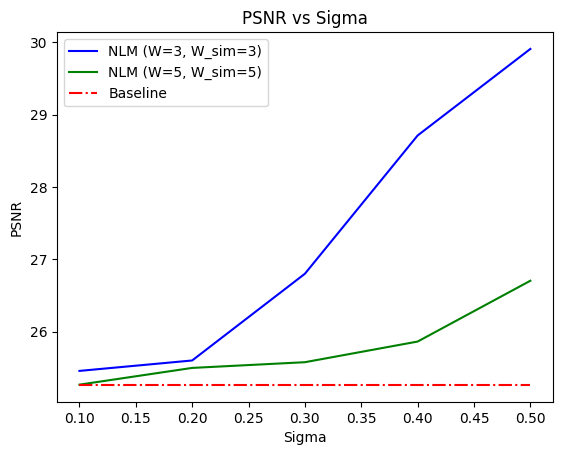

In [10]:
sigma = [i / 10 for i in range(1, 6)]
baseline_psnr_arr = [baseline_psnr for i in range(5)]
plt.plot(sigma, psnr_a, c='blue', label='NLM (W=3, W_sim=3)')
plt.plot(sigma, psnr_b, c='green', label='NLM (W=5, W_sim=5)')
plt.plot(sigma, baseline_psnr_arr, c='red', label='Baseline', linestyle='-.')
plt.legend()
plt.xlabel('Sigma')
plt.ylabel('PSNR')
plt.title('PSNR vs Sigma')
plt.savefig('data/output/q1.png')

## Q2: Gaussian Filtering

In [5]:
psnr_gauss = []

for i in tqdm(range(1, 6)):
    krishna_noisy_filtered = gaussian_filter(krishna_noisy, i / 10)
    psnr_gauss.append(get_psnr(krishna_original, krishna_noisy_filtered, 3))
    print(f"Sigma = {i / 10:2.1f}  PSNR = {psnr_b[-1]:3.2f}")

 20%|██        | 1/5 [00:00<00:03,  1.07it/s]

Sigma = 0.1  PSNR = 26.70


 40%|████      | 2/5 [00:01<00:02,  1.04it/s]

Sigma = 0.2  PSNR = 26.70


 60%|██████    | 3/5 [00:02<00:01,  1.06it/s]

Sigma = 0.3  PSNR = 26.70


 80%|████████  | 4/5 [00:03<00:00,  1.06it/s]

Sigma = 0.4  PSNR = 26.70


100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

Sigma = 0.5  PSNR = 26.70


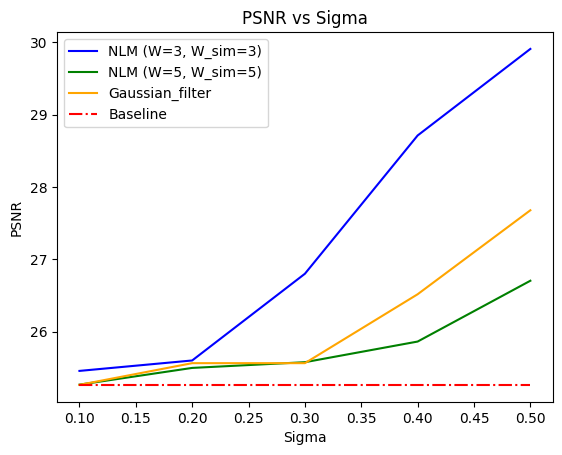

In [11]:
sigma = [i / 10 for i in range(1, 6)]
baseline_psnr_arr = [baseline_psnr for i in range(5)]
plt.plot(sigma, psnr_a, c='blue', label='NLM (W=3, W_sim=3)')
plt.plot(sigma, psnr_b, c='green', label='NLM (W=5, W_sim=5)')
plt.plot(sigma, psnr_gauss, c='orange', label='Gaussian_filter')
plt.plot(sigma, baseline_psnr_arr, c='red', label='Baseline', linestyle='-.')
plt.legend()
plt.xlabel('Sigma')
plt.ylabel('PSNR')
plt.title('PSNR vs Sigma')
plt.savefig('data/output/q2.png')

## Q3: Visualize the kernels

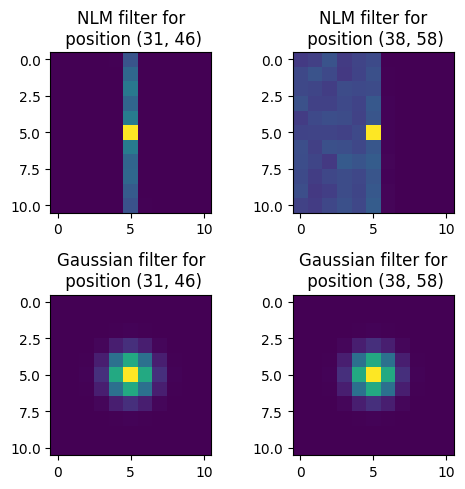

In [13]:
W, W_sim, sigma_nlm, sigma_g = 5, 3, 0.5, 1.0

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].imshow(get_nlm_filter(krishna_noisy, sigma_nlm, W_sim, W, 31, 46))
axs[0, 1].imshow(get_nlm_filter(krishna_noisy, sigma_nlm, W_sim, W, 38, 58))
axs[1, 0].imshow(get_gaussian_filter(1))
axs[1, 1].imshow(get_gaussian_filter(1))


axs[0, 0].set_title('NLM filter for\n position (31, 46)')
axs[0, 1].set_title('NLM filter for\n position (38, 58)')
axs[1, 0].set_title('Gaussian filter for\n position (31, 46)')
axs[1, 1].set_title('Gaussian filter for\n position (38, 58)')

fig.tight_layout()
fig.savefig('data/output/q3.png')

## Q4: View patches of noisy and filtered images

In [8]:
krishna_filtered_nlm = nlm_filter(krishna_noisy, 0.5, W_sim, W)
krishna_filtered_gaussian = gaussian_filter(krishna_noisy, 1.0)

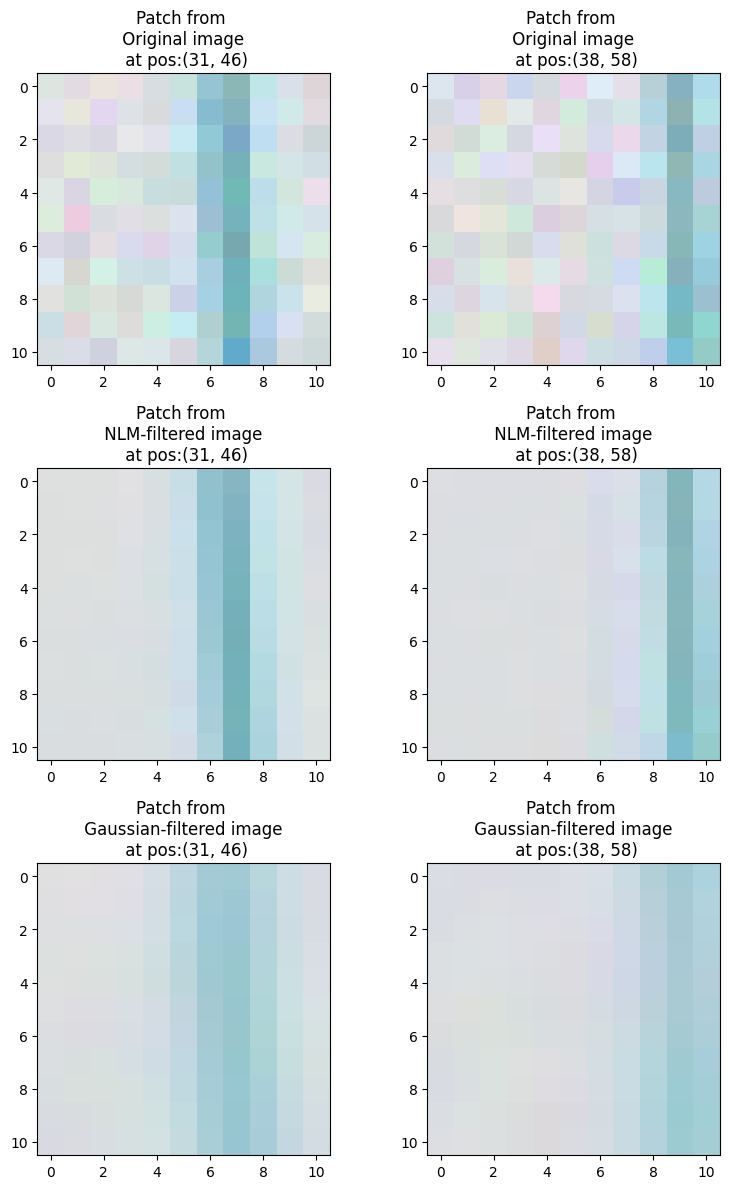

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(8, 12))

i, j = 31, 46
axs[0, 0].imshow(krishna_noisy[i - 5:i+6, j-5:j+6])
axs[1, 0].imshow(krishna_filtered_nlm[i - 5:i+6, j-5:j+6])
axs[2, 0].imshow(krishna_filtered_gaussian[i - 5:i+6, j-5:j+6])
axs[0, 0].set_title(f"Patch from \n Original image \n at pos:{i, j}")
axs[1, 0].set_title(f"Patch from \n NLM-filtered image \n at pos:{i, j}")
axs[2, 0].set_title(f"Patch from \n Gaussian-filtered image \n at pos:{i, j}")

i, j = 38, 58
axs[0, 1].imshow(krishna_noisy[i - 5:i+6, j-5:j+6])
axs[1, 1].imshow(krishna_filtered_nlm[i - 5:i+6, j-5:j+6])
axs[2, 1].imshow(krishna_filtered_gaussian[i - 5:i+6, j-5:j+6])


axs[0, 1].set_title(f"Patch from \n Original image \n at pos:{i, j}")
axs[1, 1].set_title(f"Patch from \n NLM-filtered image \n at pos:{i, j}")
axs[2, 1].set_title(f"Patch from \n Gaussian-filtered image \n at pos:{i, j}")

fig.tight_layout()
fig.savefig('data/output/q4.png')